In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

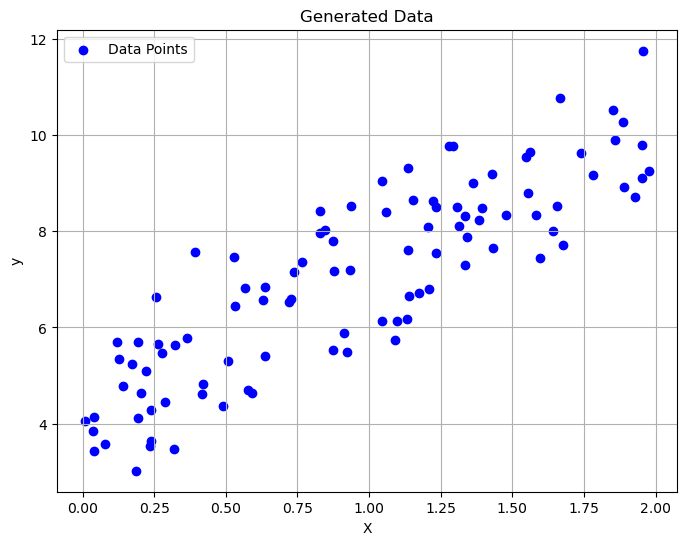

In [18]:
# 1. Univariate Linear Regression

## 1.1 Data Generation
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = mx + c + noise


# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
## 1.2 Batch Gradient Descent (BGD)

def batch_gradient_descent(X, y, learning_rate, n_iterations):
    m = 0
    c = 0
    n = len(X)
    costs = []  # Corrected: Initialize as a list
    m_history, c_history = [], []

    for _ in range(n_iterations):
        y_predicted = m * X + c
        cost = (1/n) * np.sum((y - y_predicted)**2)  # Use np.sum for correct sum
        costs.append(cost) # append the cost to the list
        m_derivative = -(2/n) * np.sum(X * (y - y_predicted))
        c_derivative = -(2/n) * np.sum(y - y_predicted)
        m = m - learning_rate * m_derivative
        c = c - learning_rate * c_derivative
        m_history.append(m)
        c_history.append(c)

    return m, c, np.array(costs).ravel(), m_history, c_history # Return costs as a 1D array

In [20]:
## 1.3 Stochastic Gradient Descent (SGD)


def stochastic_gradient_descent(X, y, learning_rate, n_epochs):
    m = 0
    c = 0
    n = len(X)
    costs = []
    m_history, c_history = [], []

    for epoch in range(n_epochs):
        for i in range(n):
            random_index = np.random.randint(n)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            y_predicted = m * xi + c
            cost = (yi - y_predicted)**2
            costs.append(cost.item())  # append the cost to the list, making it a list

            m_derivative = -2 * xi * (yi - y_predicted)
            c_derivative = -2 * (yi - y_predicted)
            m = m - learning_rate * m_derivative
            c = c - learning_rate * c_derivative
            m_history.append(m)
            c_history.append(c)

    return m, c, np.array(costs).ravel(), m_history, c_history # Return costs as a 1D array

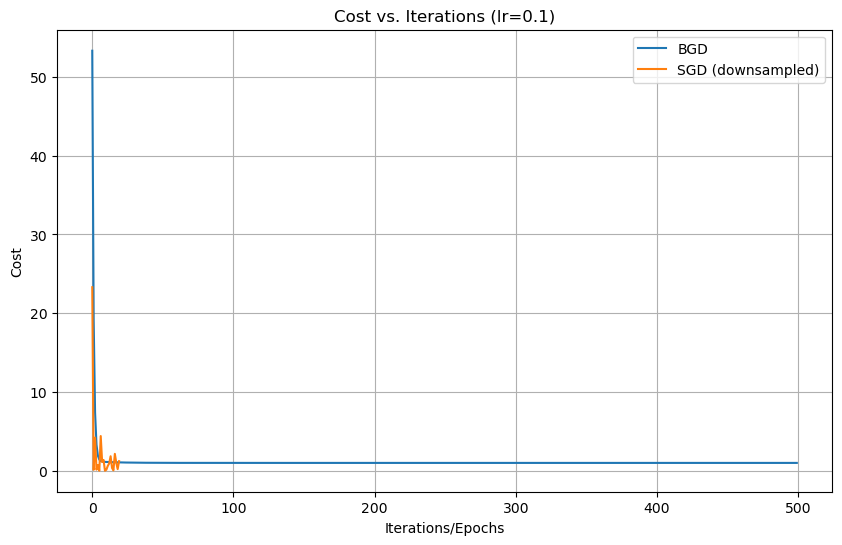

In [24]:
# 3. Cost vs. Iteration (Initial lr) + PLOT
initial_lr = 0.1
n_iterations = 500
n_epochs = 10

m_bgd_initial, c_bgd_initial, costs_bgd_initial, _, _ = batch_gradient_descent(X, y, initial_lr, n_iterations)
m_sgd_initial, c_sgd_initial, costs_sgd_initial, _, _ = stochastic_gradient_descent(X, y, initial_lr, n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(costs_bgd_initial, label='BGD')
plt.plot(costs_sgd_initial[::50], label='SGD (downsampled)') # downsample for clearer plot
plt.xlabel('Iterations/Epochs')
plt.ylabel('Cost')
plt.title(f'Cost vs. Iterations (lr={initial_lr})')
plt.legend()
plt.grid(True)
plt.show()

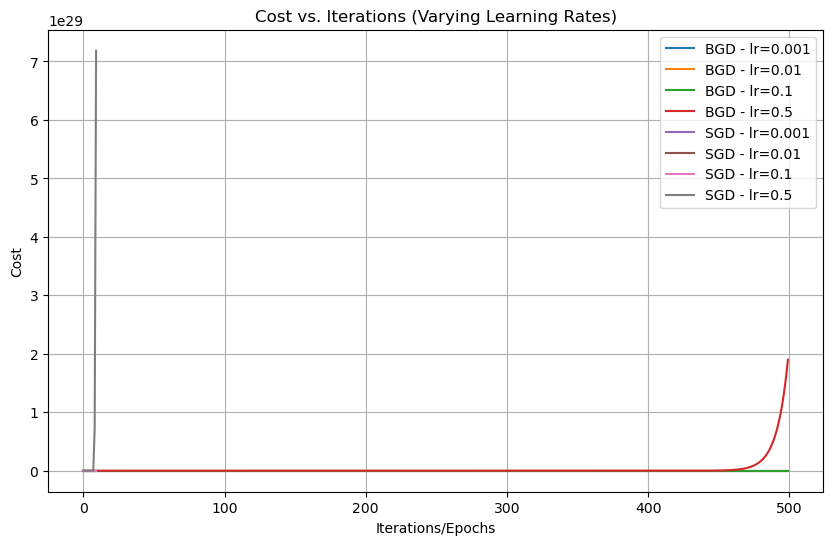

In [25]:
# 4. Hyperparameter Tuning + PLOT

learning_rates = [0.001, 0.01, 0.1, 0.5]
n_iterations = 500
n_epochs = 10

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    m_bgd, c_bgd, costs_bgd, _, _ = batch_gradient_descent(X, y, lr, n_iterations)
    plt.plot(costs_bgd, label=f'BGD - lr={lr}')

for lr in learning_rates:
    m_sgd, c_sgd, costs_sgd, _, _ = stochastic_gradient_descent(X, y, lr, n_epochs)
    plt.plot(costs_sgd[::100], label=f'SGD - lr={lr}')  # downsample

plt.xlabel('Iterations/Epochs')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations (Varying Learning Rates)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (BGD with lr=0.1): 0.9924386487246495
Mean Squared Error (SGD with lr=0.1): 1.1875435356240394


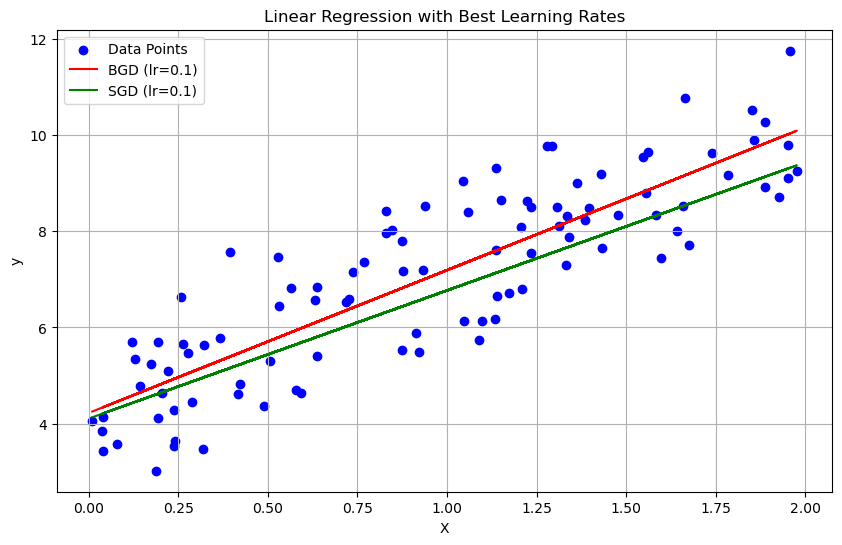

In [26]:
# 5. Best Model, Regression Lines, and MSE + PLOT
best_lr_bgd = 0.1  # Set after observing the above plots
best_lr_sgd = 0.1 # Set after observing the above plots


m_bgd, c_bgd, costs_bgd, _, _ = batch_gradient_descent(X, y, best_lr_bgd, n_iterations)
m_sgd, c_sgd, costs_sgd, _, _  = stochastic_gradient_descent(X, y, best_lr_sgd, n_epochs)

y_pred_bgd = m_bgd * X + c_bgd
y_pred_sgd = m_sgd * X + c_sgd
mse_bgd = mean_squared_error(y, y_pred_bgd)
mse_sgd = mean_squared_error(y, y_pred_sgd)



print(f"Mean Squared Error (BGD with lr={best_lr_bgd}): {mse_bgd}")
print(f"Mean Squared Error (SGD with lr={best_lr_sgd}): {mse_sgd}")



plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_bgd, color='red', label=f'BGD (lr={best_lr_bgd})')
plt.plot(X, y_pred_sgd, color='green', label=f'SGD (lr={best_lr_sgd})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Best Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

